# Data Processing

In [124]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [135]:
nasdaq = pd.read_csv("nasdaq.csv")
nyse = pd.read_csv("nyse.csv")
wsb = pd.read_csv("reddit_wsb.csv")

# Data Exploratory Analysis

In [126]:
nasdaq.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$2.36,-0.0096,-0.405%,7.404953e+07,China,NaN,4460,Miscellaneous,Service to the Health Industry
1,AACIU,Armada Acquisition Corp. I Unit,$9.88,-0.0200,-0.202%,0.000000e+00,United States,2021.0,137133,NaN,NaN
2,AADI,Aadi Bioscience Inc. Common Stock,$28.55,0.5100,1.819%,5.958197e+08,United States,NaN,48563,Health Care,Biotechnology: Pharmaceutical Preparations
3,AAL,American Airlines Group Inc. Common Stock,$20.47,0.6400,3.227%,1.325462e+10,United States,NaN,21690647,Transportation,Air Freight/Delivery Services
4,AAME,Atlantic American Corporation Common Stock,$4.515,0.2450,5.738%,9.215460e+07,United States,NaN,29644,Finance,Life Insurance


In [127]:
nyse.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$157.23,-0.62,-0.393%,4.759709e+10,United States,1999.0,562589,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$47.15,0.07,0.149%,8.821913e+09,NaN,2016.0,4006725,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.82,-0.01,-0.102%,1.227500e+09,NaN,2021.0,389373,Finance,Business Services
3,AAIC,Arlington Asset Investment Corp Class A (new),$3.86,-0.01,-0.258%,1.247979e+08,United States,NaN,35665,Consumer Services,Real Estate Investment Trusts
4,AAIC^B,Arlington Asset Investment Corp 7.00%,$24.7601,0.00,0.00%,NaN,United States,NaN,32,NaN,NaN


In [128]:
wsb.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


# Data Processing

In [136]:
wsb['timestamp'] = pd.to_datetime(wsb['timestamp'])
wsb = wsb.sort_values(by=['timestamp'])
wsb = wsb.set_index('timestamp')

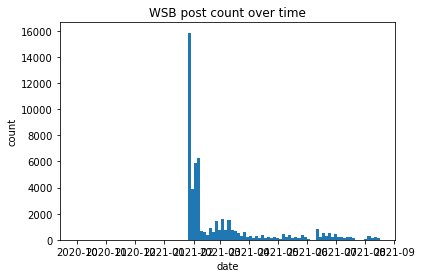

In [140]:
plt.hist(wsb.index, bins=100)
plt.xlabel("date")
plt.ylabel("count")
plt.title("WSB post count over time")
plt.show()

In [141]:
wsb = wsb.iloc[1:]

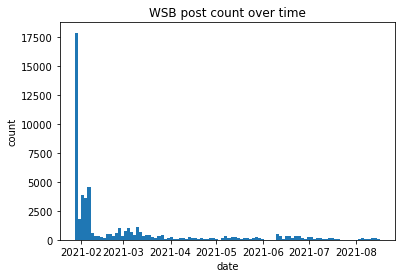

In [142]:
plt.hist(wsb.index, bins=100)
plt.xlabel("date")
plt.ylabel("count")
plt.title("WSB post count over time")
plt.show()

In [215]:
start = wsb.index[0]
end = wsb.index[-1]
delta = pd.Timedelta(days=7)
week_start = start
week_end = week_start + delta
post_by_week = []
week_lst = []
num_weeks = 0
while week_end < end:
    week_posts = wsb[week_start: week_end]
    n = week_posts.shape[0]
    # print(f"week_start = {week_start}")
    # print(f"week_end = {week_end}")
    # print(f"posts = {n}")
    week_lst.append(week_start)
    week_lst.append(week_end)
    week_start = week_end
    week_end = week_end + delta
    post_by_week.append(n)
    post_by_week.append(n)
    num_weeks += 1

print(f"num_weeks = {num_weeks}")


num_weeks = 28


In [229]:
print(start)
print(end)

2021-01-28 09:08:16
2021-08-16 09:26:20


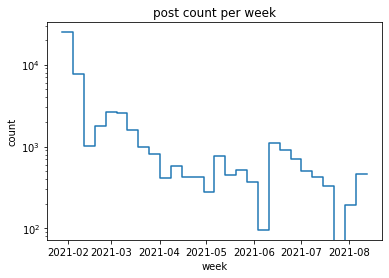

In [165]:
plt.plot(week_lst, post_by_week)
plt.yscale('log')
plt.xlabel("week")
plt.ylabel("count")
plt.title("post count per week")
plt.show()

In [167]:
wsb["title"]

timestamp
2021-01-28 09:08:16    An autists journey. $150 to $68k in one month....
2021-01-28 09:08:17         You all have made Melvin live up to its name
2021-01-28 09:08:18    I got in late on GME but I believe in the caus...
2021-01-28 09:08:19    Highest SI % of Float End of Business Jan 27th...
2021-01-28 09:08:21                           What are you doing to AMC?
                                             ...                        
2021-08-16 07:17:22                               RKT and the week ahead
2021-08-16 07:51:18    Verizon ($VZ) – Boomer’s Dividends Are Degener...
2021-08-16 07:52:22                               $HIPO - HIPPO HOLDINGS
2021-08-16 08:33:22                  Watching your porfolio after a YOLO
2021-08-16 09:26:20            The CLOV clinician letter is worth a read
Name: title, Length: 53186, dtype: object

In [214]:
import re

stock_count = {}
# Add key for Nasdaq stocks
for i in range(nasdaq.shape[0]):
    symbol = nasdaq["Symbol"][i]
    stock_count[symbol] = 0
# Add key for NYSE stocks
for i in range(nyse.shape[0]):
    symbol = nyse["Symbol"][i]
    stock_count[symbol] = 0

for i in range(wsb.shape[0]):
    title = wsb["title"][i]
    word_lst = title.upper().split()
    for w in word_lst:
        # remove special characters
        w = re.sub('[^A-Za-z0-9]+', '', w)
        if w in stock_count.keys():
            stock_count[w] = stock_count[w] + 1
        # Only count 1 apperance per title
        break
stock_count_lst = [(key, val) for key, val in stock_count.items()]
stock_count_lst.sort(reverse=True, key = lambda x: x[1])

stock_count_lst[:25]

[('GME', 1763),
 ('AMC', 756),
 ('WE', 643),
 ('A', 463),
 ('YOU', 418),
 ('IS', 411),
 ('BB', 321),
 ('CAN', 299),
 ('PLTR', 266),
 ('RKT', 243),
 ('NOK', 238),
 ('ALL', 228),
 ('SO', 224),
 ('IT', 216),
 ('UWMC', 197),
 ('FOR', 192),
 ('AM', 180),
 ('WISH', 163),
 ('NEW', 156),
 ('DD', 155),
 ('RH', 131),
 ('SNDL', 129),
 ('ARE', 125),
 ('PSA', 118),
 ('SPCE', 118)]

# Top 10 stocks
* GME
* AMC
* BB
* PLTR
* NOK
* RKT
* UWMC
* DD
* RH
* SNDL



In [223]:
col = ["GME", "AMC", "BB", "PLTR", "NOK", "RKT", "UWMC", "DD", "RH", "SNDL"]
data = pd.DataFrame(np.zeros((num_weeks, 10)), columns = col)

In [224]:
start = wsb.index[0]
delta = pd.Timedelta(days=7)
week_start = start
week_end = week_start + delta
# loop through weeks
for i in range(num_weeks):
    week_posts = wsb["title"][week_start: week_end]
    n = week_posts.shape[0]
    # loop through articles in a week
    for j in range(n):
        post = week_posts.iloc[j]
        word_lst = post.upper().split()
        for w in word_lst:
            # remove special characters
            w = re.sub('[^A-Za-z0-9]+', '', w)
            if w in col:
                data.loc[i,w] += 1
            # Only count 1 apperance per title
            break
    week_start = week_end
    week_end = week_end + delta
        

In [227]:
print(start)

2021-01-28 09:08:16


# Shows The number of posts that mentions a stock in a given week

In [225]:
data

,GME,AMC,BB,PLTR,NOK,RKT,UWMC,DD,RH,SNDL
0,796.0,384.0,178.0,24.0,169.0,1.0,0.0,19.0,106.0,91.0
1,340.0,97.0,30.0,4.0,22.0,1.0,4.0,19.0,16.0,7.0
2,26.0,4.0,3.0,17.0,4.0,4.0,1.0,9.0,1.0,4.0
3,38.0,21.0,10.0,47.0,6.0,7.0,1.0,14.0,2.0,6.0
4,139.0,29.0,8.0,17.0,5.0,124.0,15.0,16.0,4.0,2.0
5,143.0,39.0,10.0,29.0,2.0,27.0,27.0,17.0,1.0,2.0
6,83.0,41.0,8.0,8.0,12.0,11.0,24.0,3.0,0.0,2.0
7,62.0,10.0,2.0,14.0,2.0,14.0,31.0,4.0,0.0,0.0
8,30.0,9.0,15.0,10.0,0.0,5.0,9.0,3.0,0.0,0.0
9,14.0,3.0,5.0,6.0,0.0,3.0,2.0,3.0,0.0,1.0
